# Setup

In [1]:
import numpy as np
import os
import glob
import pandas as pd
import sys
import yaml

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style( 'whitegrid' )

## Load Data

In [3]:
with open( './config.yml', "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [4]:
input_dir = os.path.join( config['data_dir'], config['input_dirname'] )
output_dir = os.path.join( config['data_dir'], config['output_dirname'] )

In [5]:
# Directory for figures
figure_dir = config['figure_dir']
os.makedirs( figure_dir, exist_ok=True )

In [6]:
grouping_labels = [ group_by_i.lower().replace( ' ', '_' ) for group_by_i in config['groupings'] ]

In [7]:
# Load the counts data
counts_dfs = []
for i, group_by_i in enumerate( config['groupings'] ):
    
    counts_i_fp = os.path.join( output_dir, 'counts', 'counts.{}.csv'.format( grouping_labels[i] ) )
    counts_i =  pd.read_csv( counts_i_fp, index_col=0 )
    counts_dfs.append( counts_i )

# Counts Per Year

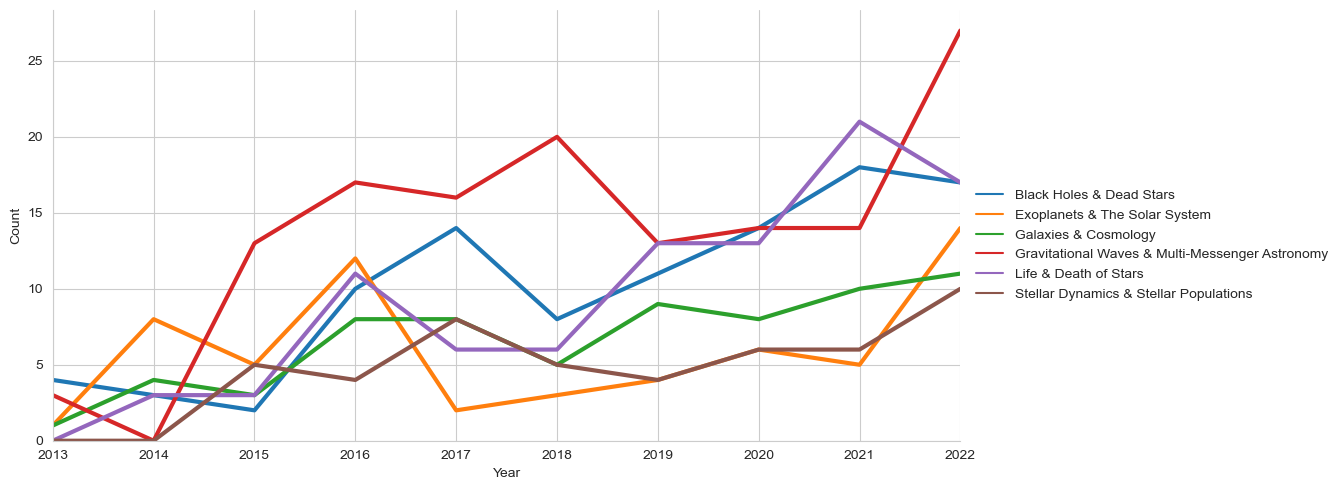

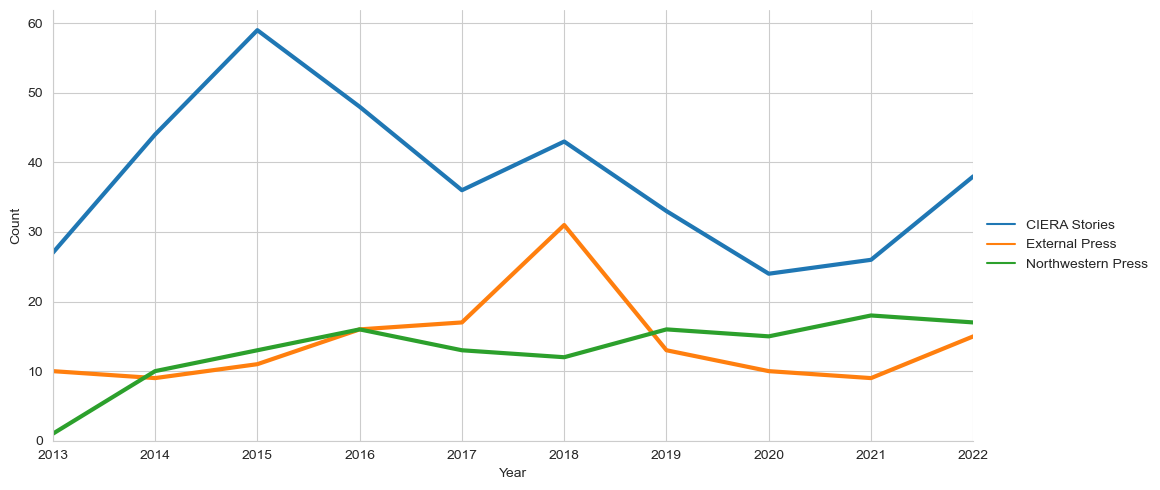

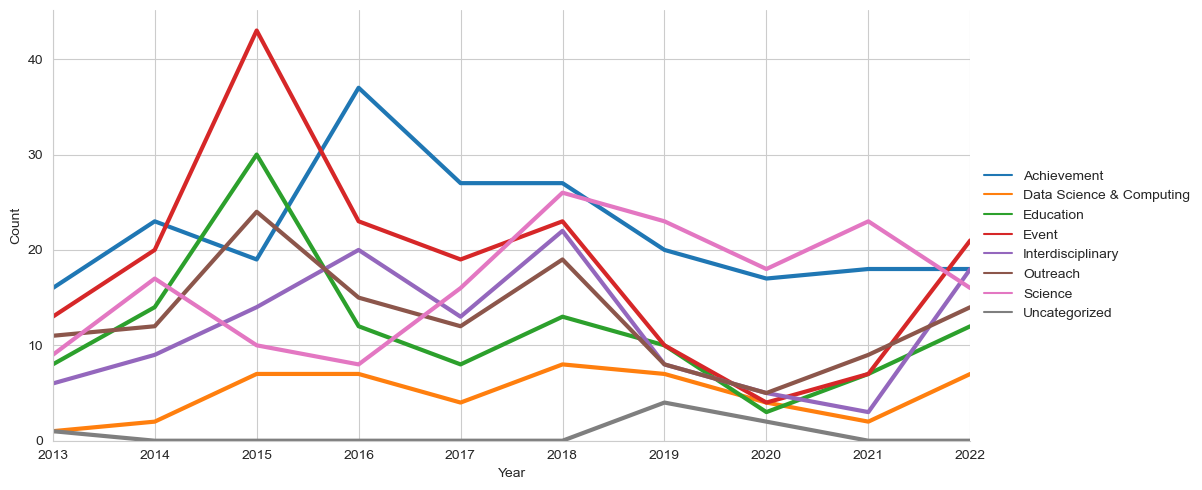

In [14]:
for i, group_by_i in enumerate( config['groupings'] ):
    
    # Get data
    counts_i =  counts_dfs[i]
    
    years = counts_i.index
    
    facet_grid = sns.relplot(
        counts_i,
        kind = 'line',
        dashes = False,
        linewidth = 3,
        aspect = 2
    )
    facet_grid.ax.set_xlim( years[0], years[-1] )
    facet_grid.ax.set_ylim( 0, facet_grid.ax.get_ylim()[1] )
    ticks = facet_grid.ax.set_xticks( years )
    facet_grid.ax.set_ylabel( 'Count' )

    # Save
    save_fn = 'count_per_year.{}.pdf'.format( group_by_i.lower().replace( ' ', '_' ) )
    save_dir = os.path.join( figure_dir, 'counts' )
    os.makedirs( save_dir, exist_ok=True )
    save_fp = os.path.join( save_dir, save_fn )
    facet_grid.fig.savefig( save_fp, bbox_inches='tight' )
